## Linear Regression

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

## Linear Regression

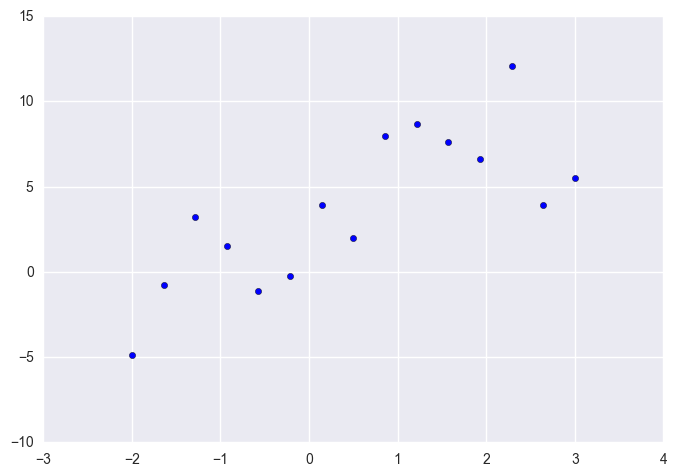

In [3]:
def simulate_points(a,b,max_noise):
    x=np.linspace(-2,3,15)
    y= a*x+b
    y_noise= np.random.uniform(-max_noise,max_noise,len(x))
    y+=y_noise
    return(x,y)
points = simulate_points(2,3,5)
plt.scatter(points[0],points[1])
plt.show()

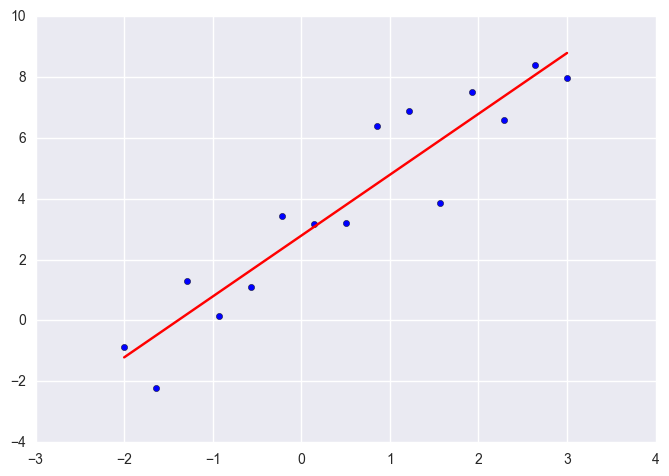

In [4]:
model = LinearRegression()
points = simulate_points(2,3,2.5)
x= points[0].reshape(-1,1)
model.fit(x,points[1])
y_predicted=model.predict(x)

plt.scatter(points[0],points[1])
plt.plot(points[0],y_predicted,color='red')
plt.show()

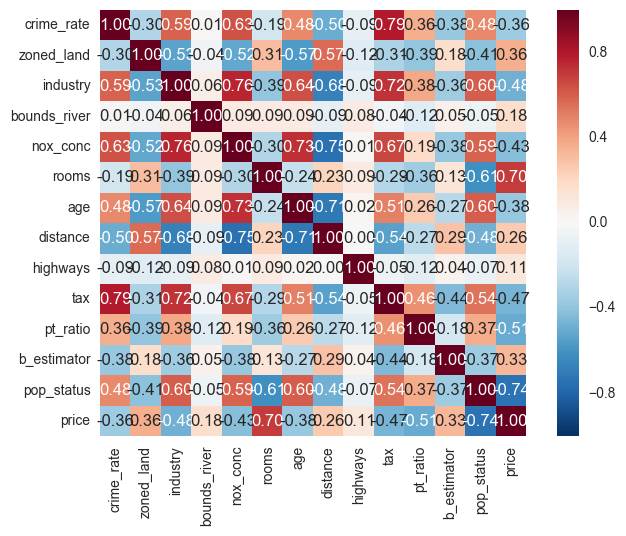

In [5]:
housing= pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",header=None) 
housing.columns = ["crime_rate", "zoned_land", "industry",
"bounds_river", "nox_conc", "rooms", "age", "distance",
"highways", "tax", "pt_ratio", "b_estimator", "pop_status", "price"]

sns.heatmap(housing.corr(),annot=True,fmt=".2f",square=True)
plt.show()

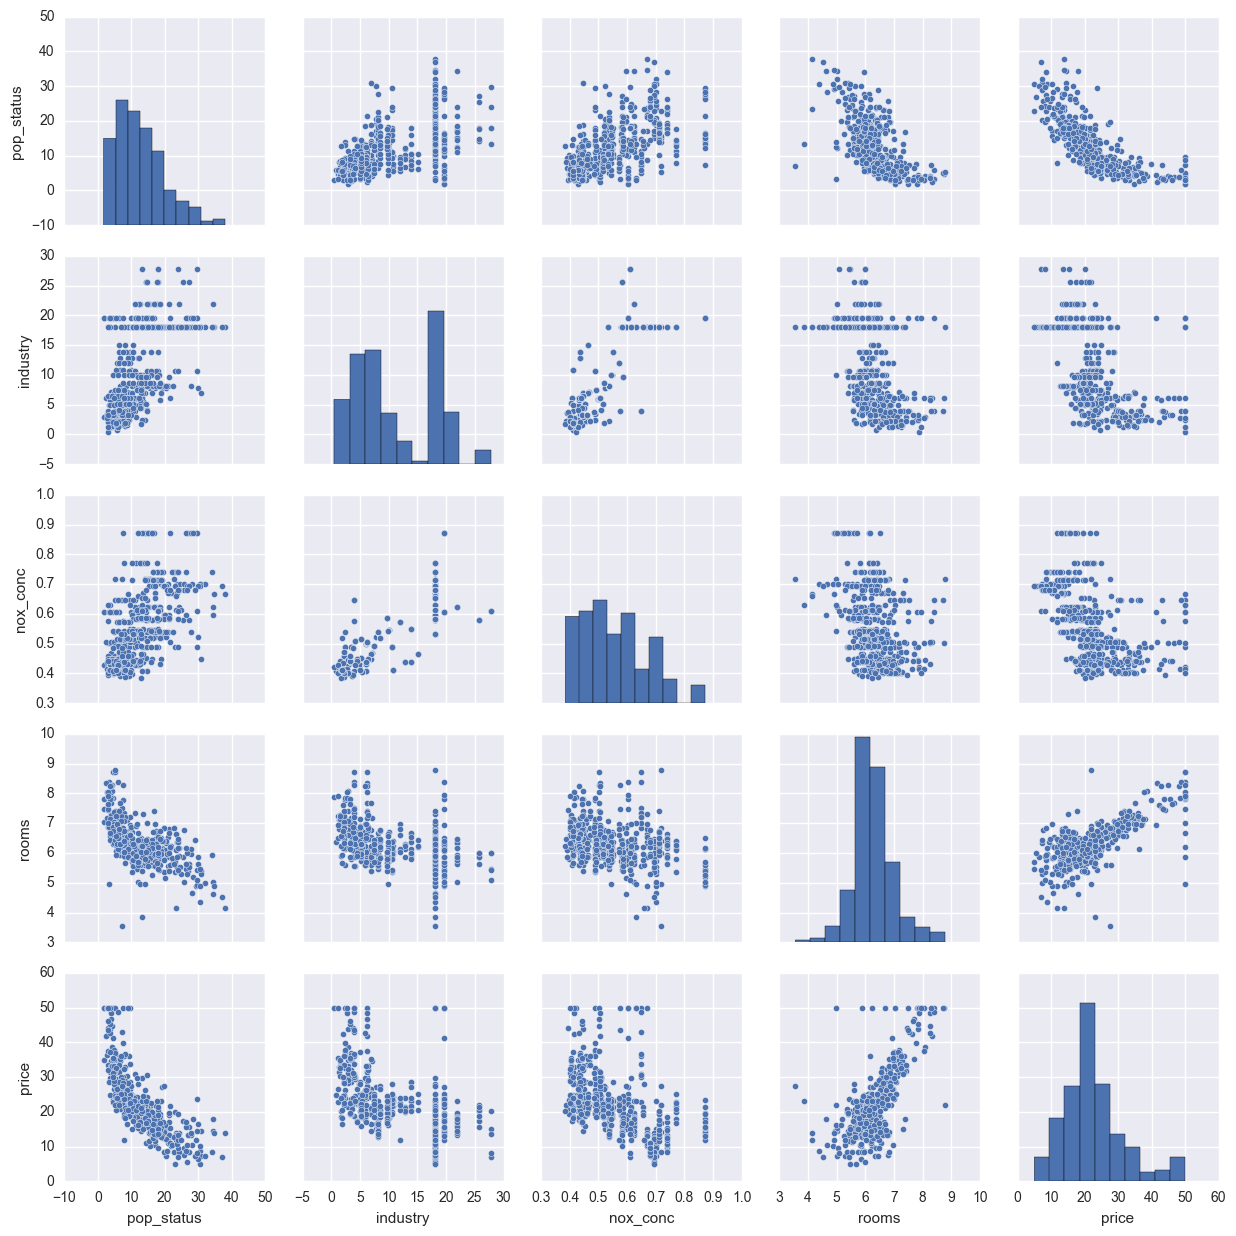

In [6]:
sns.pairplot(housing[["pop_status", "industry",
"nox_conc", "rooms", "price"]])
plt.show()

In [7]:
housing_model= LinearRegression()
training_values=housing.drop('price',axis=1)
housing_model.fit(training_values,housing.price)
print(housing_model.coef_)
print(housing_model.intercept_)

[  2.09281375e-01   1.49403979e-02   1.27164577e-02   3.00565375e+00
  -1.55234852e+01   4.29955958e+00   2.84848139e-03  -1.08366345e+00
   1.93258621e-01  -2.42034372e-03  -9.65535221e-01   9.43510233e-03
  -5.25242783e-01]
28.3051107501


In [8]:
indices = np.random.randint(0,len(housing), 5)
houses = housing.ix[indices]
predicted=housing_model.predict(houses.drop("price", axis=1))
print(predicted)
print(houses.price)

[ 26.57001194  17.71107409  35.05847573  22.11565459  20.58465044]
348    24.5
441    17.1
264    36.5
172    23.1
339    19.0
Name: price, dtype: float64


In [10]:
ransac = RANSACRegressor()
ransac.fit(housing.drop("price", axis = 1), housing.price)
print(ransac.estimator_.coef_,ransac.estimator_.intercept_)

[ -3.23787953e-01   3.33281740e-02  -2.66364926e-01   1.13520830e+00
   6.69652892e+00   2.78559812e-01  -2.57457677e-03  -3.96265638e-01
   1.57270225e-01   5.17464564e-03  -9.12008383e-01   6.40130998e-03
  -6.77367832e-01] 41.1084021854


In [20]:
ransac= RANSACRegressor(LinearRegression(),
                        min_samples=50, max_trials = 100,
                        residual_threshold = 5.0)
inliers = housing[ransac.inlier_mask_]
outliers =housing[~ransac.inlier_mask_]
plt.scatter(inliers.rooms, inliers.price)
plt.scatter(outliers.rooms, outliers.price)

AttributeError: 'RANSACRegressor' object has no attribute 'inlier_mask_'

In [28]:
x = np.arange(6).reshape(3,2)
poly = PolynomialFeatures(2)
x_transformed = poly.fit_transform(x)
print(poly.get_feature_names())
print(poly.n_input_features_)
print(poly.n_output_features_)

AttributeError: 'PolynomialFeatures' object has no attribute 'get_feature_names'

In [42]:
x = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0,  480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])
quadratic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree=4)
x_quad = quadratic.fit_transform(x)
x_cub = cubic.fit_transform(x)

In [43]:
linear_model=LinearRegression()
quadratic_model=LinearRegression()
cubic_model=LinearRegression()
linear_model.fit(x,y)
quadratic_model.fit(quadratic.fit_transform(x),y)
cubic_model.fit(cubic.fit_transform(x),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

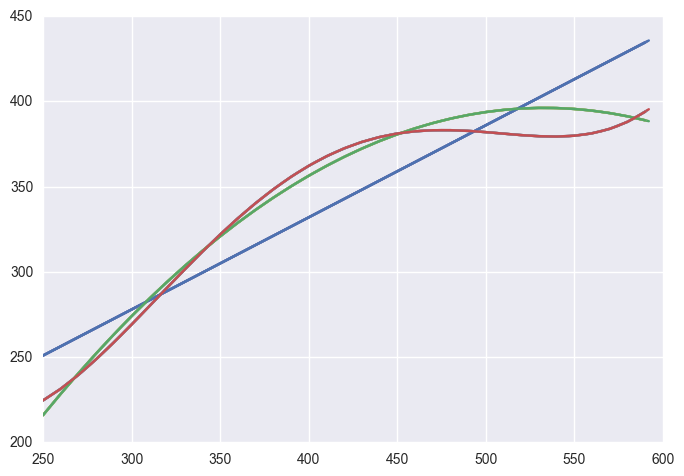

In [51]:
x_test = np.arange(250, 600, 10)[:, np.newaxis]
y_linear_model=linear_model.predict(x_test)
y_quadratic_model=quadratic_model.predict(quadratic.fit_transform(x_test))
y_cubic_model=cubic_model.predict(cubic.fit_transform(x_test))
plt.plot(x_test,y_linear_model)
plt.plot(x_test,y_quadratic_model)
plt.plot(x_test,y_cubic_model)
plt.show()

In [57]:
rnd_housing = housing.sample(7)
rnd_housing
x_pop_status=rnd_housing.pop_status
y_price=rnd_housing.price
quadratic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree=4)
pop_quad=quadratic.fit_transform(x_pop_status.reshape(-1,1))
pop_cub=cubic.fit_transform(x_pop_status.reshape(-1,1))


In [63]:
housing_lin_model= LinearRegression()
housing_quad_model= LinearRegression()
housing_cub_model= LinearRegression()

housing_lin_model.fit(x_pop_status.reshape(-1,1),y_price)
housing_quad_model.fit(quadratic.fit_transform(x_pop_status.reshape(-1,1)),y_price)
housing_cub_model.fit(cubic.fit_transform(x_pop_status.reshape(-1,1)),y_price)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
rnd_housing_test=housing.sample(3)
pop_status_test=rnd_housing_test.pop_status
price_answer=rnd_housing_test.price


In [69]:
print(housing_lin_model.predict(pop_status_test.reshape(-1,1)))
print(price_answer)

[ 15.83188748  28.79908517  30.9977956 ]
135    18.1
215    25.0
91     22.0
Name: price, dtype: float64


In [72]:
print(housing_quad_model.predict(quadratic.fit_transform(pop_status_test.reshape(-1,1))))
print(price_answer)

[ 12.55404995  25.9303679   29.88354021]
135    18.1
215    25.0
91     22.0
Name: price, dtype: float64


In [73]:
print(housing_cub_model.predict(cubic.fit_transform(pop_status_test.reshape(-1,1))))
print(price_answer)

[ 15.43219969  20.784178    21.58177933]
135    18.1
215    25.0
91     22.0
Name: price, dtype: float64


## Logistic Regression

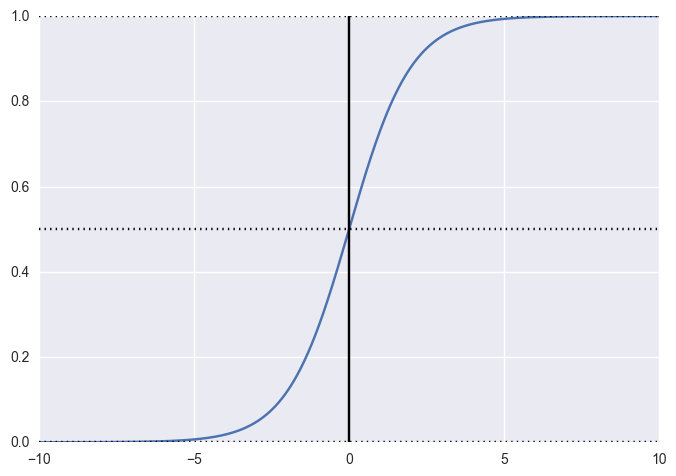

In [74]:
x = np.linspace(-10, 10, 1000)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)
plt.axhline(0, ls = "dotted", color = "black")
plt.axhline(0.5, ls = "dotted", color = "black")
plt.axhline(1, ls = "dotted", color = "black")
plt.axvline(0, color = "black")
plt.show()


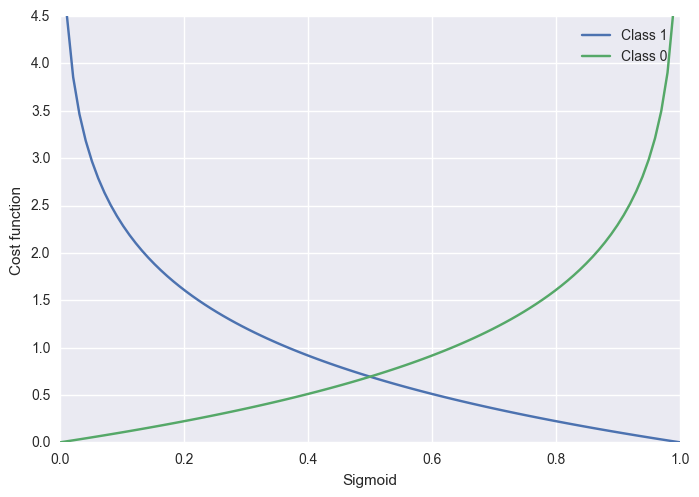

In [75]:
x = np.linspace(0.001, 1, 100)
class_1 = -np.log(x)
class_0 = -np.log(1 - x)
plt.plot(x, class_1, label = "Class 1")
plt.plot(x, class_0, label = "Class 0")
plt.xlabel("Sigmoid")
plt.ylabel("Cost function")
plt.ylim(0, 4.5)
plt.legend()
plt.show()


In [87]:
irises = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
irises.columns=['sepal_length','sepalwidth','petallength','petalwidth','types']

sepal_length  sepalwidth  petallength  petalwidth           types
0             5.1         3.5          1.4         0.2     Iris-setosa
1             4.9         3.0          1.4         0.2     Iris-setosa
2             4.7         3.2          1.3         0.2     Iris-setosa
3             4.6         3.1          1.5         0.2     Iris-setosa
4             5.0         3.6          1.4         0.2     Iris-setosa
5             5.4         3.9          1.7         0.4     Iris-setosa
6             4.6         3.4          1.4         0.3     Iris-setosa
7             5.0         3.4          1.5         0.2     Iris-setosa
8             4.4         2.9          1.4         0.2     Iris-setosa
9             4.9         3.1          1.5         0.1     Iris-setosa
10            5.4         3.7          1.5         0.2     Iris-setosa
11            4.8         3.4          1.6         0.2     Iris-setosa
12            4.8         3.0          1.4         0.1     Iris-setosa
13            4.3         3.0          1.1         0.1     Iris-setosa
14            5.8         4.0          1.2         0.2     Iris-setosa
15            5.7         4.4          1.5         0.4     Iris-setosa
16            5.4         3.9          1.3         0.4     Iris-setosa
17            5.1         3.5          1.4         0.3     Iris-setosa
18            5.7         3.8          1.7         0.3     Iris-setosa
19            5.1         3.8          1.5         0.3     Iris-setosa
20            5.4         3.4          1.7         0.2     Iris-setosa
21            5.1         3.7          1.5         0.4     Iris-setosa
22            4.6         3.6          1.0         0.2     Iris-setosa
23            5.1         3.3          1.7         0.5     Iris-setosa
24            4.8         3.4          1.9         0.2     Iris-setosa
25            5.0         3.0          1.6         0.2     Iris-setosa
26            5.0         3.4          1.6         0.4     Iris-setosa
27            5.2         3.5          1.5         0.2     Iris-setosa
28            5.2         3.4          1.4         0.2     Iris-setosa
29            4.7         3.2          1.6         0.2     Iris-setosa
..            ...         ...          ...         ...             ...
120           6.9         3.2          5.7         2.3  Iris-virginica
121           5.6         2.8          4.9         2.0  Iris-virginica
122           7.7         2.8          6.7         2.0  Iris-virginica
123           6.3         2.7          4.9         1.8  Iris-virginica
124           6.7         3.3          5.7         2.1  Iris-virginica
125           7.2         3.2          6.0         1.8  Iris-virginica
126           6.2         2.8          4.8         1.8  Iris-virginica
127           6.1         3.0          4.9         1.8  Iris-virginica
128           6.4         2.8          5.6         2.1  Iris-virginica
129           7.2         3.0          5.8         1.6  Iris-virginica
130           7.4         2.8          6.1         1.9  Iris-virginica
131           7.9         3.8          6.4         2.0  Iris-virginica
132           6.4         2.8          5.6         2.2  Iris-virginica
133           6.3         2.8          5.1         1.5  Iris-virginica
134           6.1         2.6          5.6         1.4  Iris-virginica
135           7.7         3.0          6.1         2.3  Iris-virginica
136           6.3         3.4          5.6         2.4  Iris-virginica
137           6.4         3.1          5.5         1.8  Iris-virginica
138           6.0         3.0          4.8         1.8  Iris-virginica
139           6.9         3.1          5.4         2.1  Iris-virginica
140           6.7         3.1          5.6         2.4  Iris-virginica
141           6.9         3.1          5.1         2.3  Iris-virginica
142           5.8         2.7          5.1         1.9  Iris-virginica
143           6.8         3.2          5.9         2.3  Iris-virginica
144           6.7         3.3

In [96]:
test_indices = np.random.randint(0, len(irises), 5)
train_indices = np.delete(np.arange(len(irises)), test_indices)

iris_train = irises.ix[train_indices]
iris_train_data=iris_train.drop('types',axis=1)
iris_train_labels=iris_train.types

iris_test = irises.ix[test_indices]
iris_test_data=iris_test.drop('types',axis=1)
iris_test_labels=iris_test.types

irises_model=LogisticRegression()
irises_model.fit(iris_train_data,iris_train_labels)
print(irises_model.predict(iris_test_data))
print(irises_model.predict_proba(iris_test_data))
print(iris_test_labels)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor']
[[  2.12215649e-02   8.69029371e-01   1.09749064e-01]
 [  9.04423072e-01   9.55644803e-02   1.24477175e-05]
 [  1.15258526e-03   1.82342048e-01   8.16505367e-01]
 [  8.59000535e-01   1.40962438e-01   3.70276413e-05]
 [  5.36147324e-02   8.36475687e-01   1.09909580e-01]]
62     Iris-versicolor
46         Iris-setosa
115     Iris-virginica
11         Iris-setosa
81     Iris-versicolor
Name: types, dtype: object
